In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [2]:
#import CSV file
red_df = pd.read_csv('Resources/Data/winequality-red.csv', delimiter=';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# drop duplicate data
red_df = red_df.drop_duplicates(keep = 'first', inplace = False)
red_df = red_df.dropna(axis = 'columns', how='all')
red_df = red_df.reset_index(drop = True)
#red_df

In [4]:
red_stats = red_df.describe()
red_stats.drop(["count"], axis=0, inplace=True)
red_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [5]:
#datatype 
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [6]:
# check for null values
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
red_df.shape

(1359, 12)

In [8]:
red_df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [9]:
# Features for Quality
bins = [2,6,9]
group_names = ['Fair','Very Good']
red_df['quality'] = pd.cut(red_df['quality'], bins, labels = group_names)

In [10]:
X = red_df.drop("quality", axis =1)
y = red_df["quality"]

In [11]:
red_df['quality'].value_counts()

Fair         1175
Very Good     184
Name: quality, dtype: int64

In [12]:
# Feature Importance

#from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
#model.fit(X,y)
#print(model.feature_importances_)

#feat_importances = pd.Series(model.feature_importances_, index = X.columns)
#feat_importances.nlargest(11).plot(kind= "barh" , color = "#722F37")
#plt.savefig('Resources/images/red_features_importance.jpg')
#plt.show()


In [13]:
#feat_importances.sort_values(ascending=False)

In [14]:
# Selected important features : Top 5 Features
selected_features = X[['alcohol', 'sulphates','volatile acidity','citric acid','density']]                         

# Create a Train Test Split 

## All Features

In [ ]:
# Split the data using train_test_split
# create the train and validation datasets

from sklearn.model_selection import train_test_split

X_train, X_left, y_train, y_left = train_test_split(X,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

# Pre-pocessing 

In [ ]:
# Scale the data using the StandardScaler and perform some feature selection
X_scale = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras


In [ ]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=11))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))


In [ ]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model.summary()

In [ ]:
# fit model

history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

# Quantify our Trained Model

In [ ]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

# Make Predictions

In [ ]:
encoded_predictions=np.argmax(deep_model.predict(X_test_scaled[:5]), axis=1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

## Results - All Features

In [ ]:
# Plot Loss during training - all features
from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('Resources/images/dl_red_loss_all.jpg')
plt.show()

In [ ]:
# plot accuracy during training
from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
plt.savefig('Resources/images/dl_red_accuracy_all.jpg')
pyplot.show()

# Save the Model

In [ ]:
# Save the Model (test all features, selected features)

filename = 'Resources/results/dl_red_all.h5'


# Create a Train Test Split 
## Top 5 Features

In [15]:
# Selected important features - top 5
selected_features = X[['alcohol', 'density','free sulfur dioxide','residual sugar','pH']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [17]:
X_train.shape, X_val.shape, X_test.shape

((951, 5), (285, 5), (123, 5))

# Pre-pocessing 

In [18]:
# Scale the data using the StandardScaler and perform some feature selection
X_scale = StandardScaler().fit(X_train)

In [19]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [23]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(951, 5) (123, 5) (951,)


In [24]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [25]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Train the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
# Create model and add layers
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=5))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [28]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit model

history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_split=.2 ,
    epochs=30,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_scaled, y_test_categorical)
)

Epoch 1/30
24/24 - 0s - loss: 0.7137 - accuracy: 0.3763 - val_loss: 0.6819 - val_accuracy: 0.6021
Epoch 2/30
24/24 - 0s - loss: 0.6653 - accuracy: 0.7487 - val_loss: 0.6348 - val_accuracy: 0.8429
Epoch 3/30
24/24 - 0s - loss: 0.6246 - accuracy: 0.8434 - val_loss: 0.5944 - val_accuracy: 0.8796
Epoch 4/30
24/24 - 0s - loss: 0.5873 - accuracy: 0.8566 - val_loss: 0.5555 - val_accuracy: 0.8953
Epoch 5/30
24/24 - 0s - loss: 0.5503 - accuracy: 0.8566 - val_loss: 0.5214 - val_accuracy: 0.8953
Epoch 6/30
24/24 - 0s - loss: 0.5162 - accuracy: 0.8566 - val_loss: 0.4917 - val_accuracy: 0.8953
Epoch 7/30
24/24 - 0s - loss: 0.4845 - accuracy: 0.8566 - val_loss: 0.4641 - val_accuracy: 0.8953
Epoch 8/30
24/24 - 0s - loss: 0.4549 - accuracy: 0.8566 - val_loss: 0.4426 - val_accuracy: 0.8953
Epoch 9/30
24/24 - 0s - loss: 0.4281 - accuracy: 0.8553 - val_loss: 0.4239 - val_accuracy: 0.8953
Epoch 10/30
24/24 - 0s - loss: 0.4040 - accuracy: 0.8553 - val_loss: 0.4062 - val_accuracy: 0.8953
Epoch 11/30
24/24 -

# Quantify our Trained Model

In [31]:
#evaluate the model
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

4/4 - 0s - loss: 0.2807 - accuracy: 0.9024
Normal Neural Network - Loss: 0.2807089388370514, Accuracy: 0.9024389982223511


# Make Predictions

In [32]:
#encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])
encoded_predictions=np.argmax(deep_model.predict(X_test_scaled[:5]), axis=-1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [33]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Fair' 'Fair' 'Fair' 'Fair' 'Fair']
Actual Labels: ['Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [34]:
predictions = deep_model.predict(X_test_scaled)

## Results - Top 5 Features

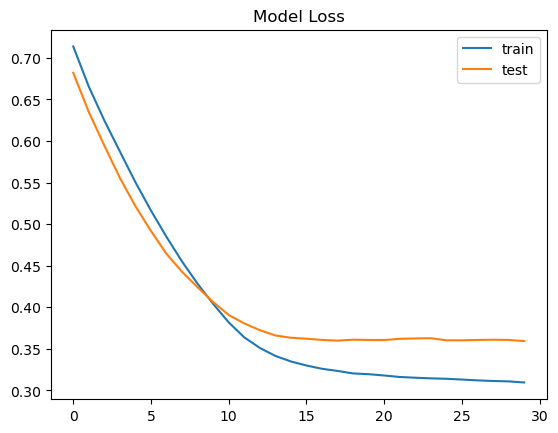

In [39]:
# Plot Loss during training - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('Resources/images/dl_red_loss_selected.jpg')
plt.show()

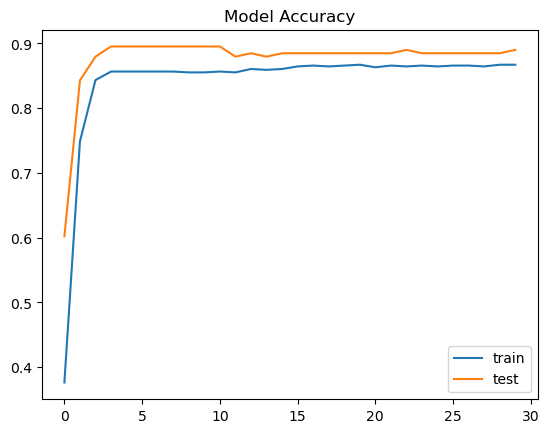

In [38]:
# Plot Loss during Accuracy - Top5 Features

from matplotlib import pyplot
#pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
plt.savefig('Resources/images/dl_red_accuracy_selected.jpg')
pyplot.show()

# Save the Model

In [37]:
# Save the Model (test all features, selected features)

filename = 'Resources/results/dl_red_selected.h5'
